In [1]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load the DistilGPT-2 model and tokenizer
model = GPT2LMHeadModel.from_pretrained('distilgpt2')
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Make sure to set the model to evaluation mode
model.eval()

def llm_predict_paddle_action(ball_x, ball_y, player_paddle_y):
    # Construct the game state description
    input_text = (f"The ball is at position ({ball_x}, {ball_y}). "
                  f"The paddle is at y = {player_paddle_y}. "
                  f"Should the paddle move up, down, or stay still to intercept the ball?")

    # Tokenize the input text
    inputs = tokenizer(input_text, return_tensors="pt")

    # Generate the model's output
    with torch.no_grad():
        outputs = model.generate(inputs['input_ids'], max_new_tokens=10)

    # Decode the output and extract the generated text
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(f"Model output: {generated_text}")

    # Infer the paddle movement from the generated text
    if 'up' in generated_text:
        return 2  # Move up
    elif 'down' in generated_text:
        return 3  # Move down
    else:
        return 0  # Stay still


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [2]:
import time
import gym
import cv2
import numpy as np

# Initialize the Pong environment
env = gym.make('Pong-v4', render_mode='rgb_array')
env.reset()
def detect_ball(frame):
    if frame is not None:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        _, thresh_frame = cv2.threshold(gray_frame, 150, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            if w < 15 and h < 15:
                return (x, y)
    return None


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


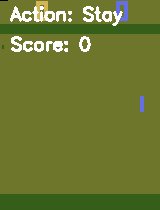

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


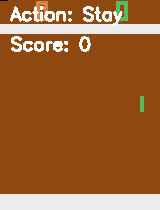

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


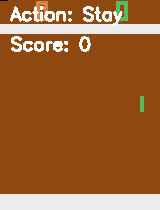

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


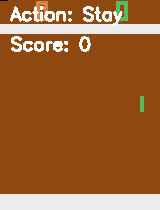

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


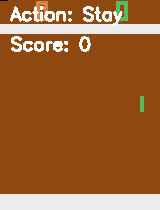

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


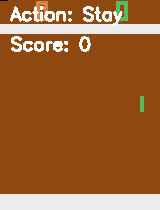

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


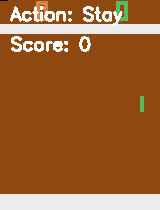

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


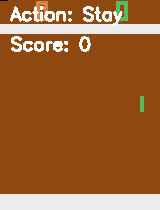

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


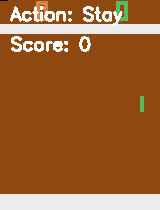

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


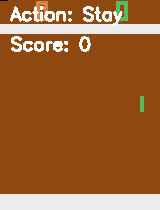

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


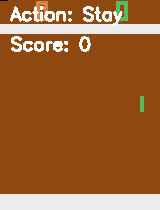

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


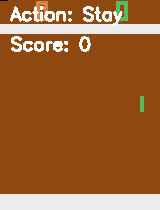

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


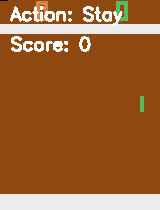

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


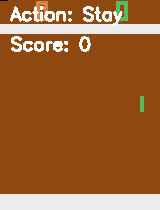

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


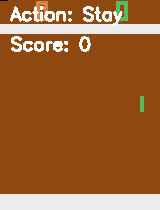

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


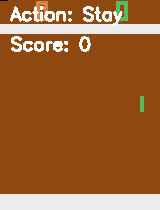

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


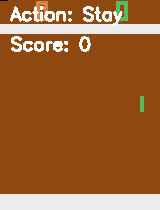

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


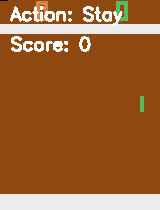

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


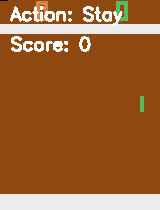

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


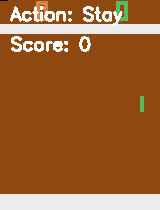

Frame captured successfully: (210, 160, 3)
Ball position: (78, 115)


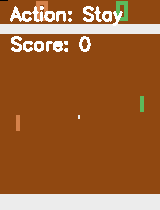

Frame captured successfully: (210, 160, 3)
Ball position: (74, 119)
Predicted ball y position: 49.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












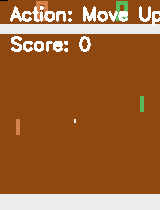

Frame captured successfully: (210, 160, 3)
Ball position: (72, 121)
Predicted ball y position: 49.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












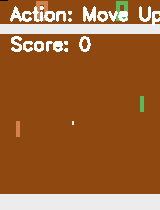

Frame captured successfully: (210, 160, 3)
Ball position: (69, 124)
Predicted ball y position: 49.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


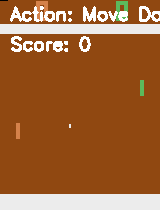

Frame captured successfully: (210, 160, 3)
Ball position: (67, 126)
Predicted ball y position: 49.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












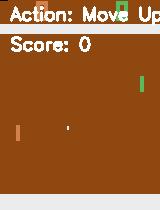

Frame captured successfully: (210, 160, 3)
Ball position: (65, 128)
Predicted ball y position: 49.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


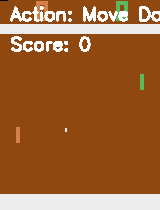

Frame captured successfully: (210, 160, 3)
Ball position: (63, 130)
Predicted ball y position: 49.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












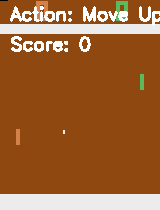

Frame captured successfully: (210, 160, 3)
Ball position: (59, 134)
Predicted ball y position: 49.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


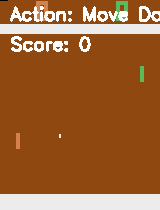

Frame captured successfully: (210, 160, 3)
Ball position: (55, 138)
Predicted ball y position: 49.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












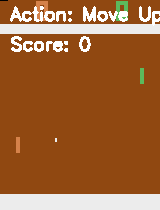

Frame captured successfully: (210, 160, 3)
Ball position: (53, 140)
Predicted ball y position: 49.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


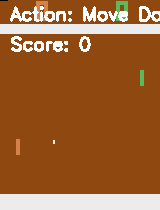

Frame captured successfully: (210, 160, 3)
Ball position: (49, 144)
Predicted ball y position: 49.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












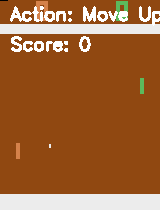

Frame captured successfully: (210, 160, 3)
Ball position: (47, 146)
Predicted ball y position: 49.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


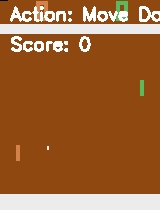

Frame captured successfully: (210, 160, 3)
Ball position: (44, 149)
Predicted ball y position: 49.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












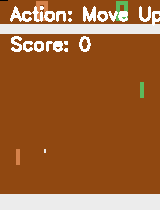

Frame captured successfully: (210, 160, 3)
Ball position: (40, 153)
Predicted ball y position: 49.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


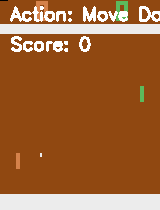

Frame captured successfully: (210, 160, 3)
Ball position: (36, 157)
Predicted ball y position: 49.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












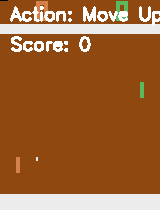

Frame captured successfully: (210, 160, 3)
Ball position: (33, 160)
Predicted ball y position: 49.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


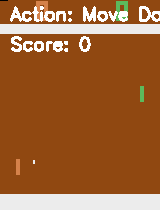

Frame captured successfully: (210, 160, 3)
Ball position: (31, 162)
Predicted ball y position: 49.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












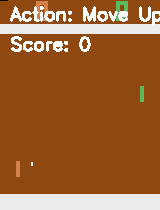

Frame captured successfully: (210, 160, 3)
Ball position: (29, 164)
Predicted ball y position: 49.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


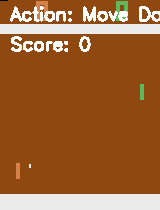

Frame captured successfully: (210, 160, 3)
Ball position: (25, 168)
Predicted ball y position: 49.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












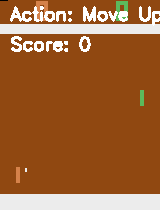

Frame captured successfully: (210, 160, 3)
Ball position: (22, 171)
Predicted ball y position: 49.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


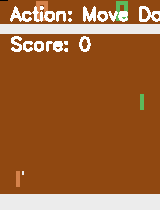

Frame captured successfully: (210, 160, 3)
Ball position: (20, 172)
Predicted ball y position: 110.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


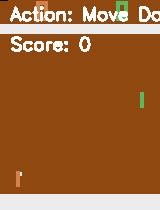

Frame captured successfully: (210, 160, 3)
Ball position: (22, 168)
Predicted ball y position: 76.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












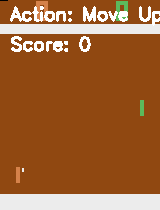

Frame captured successfully: (210, 160, 3)
Ball position: (25, 162)
Predicted ball y position: 76.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


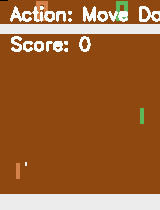

Frame captured successfully: (210, 160, 3)
Ball position: (27, 158)
Predicted ball y position: 76.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












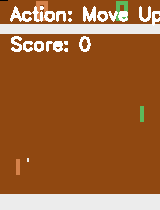

Frame captured successfully: (210, 160, 3)
Ball position: (29, 154)
Predicted ball y position: 76.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


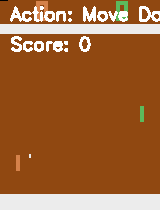

Frame captured successfully: (210, 160, 3)
Ball position: (33, 146)
Predicted ball y position: 76.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












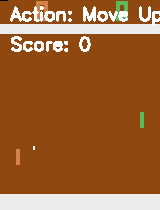

Frame captured successfully: (210, 160, 3)
Ball position: (36, 140)
Predicted ball y position: 76.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


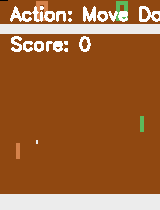

Frame captured successfully: (210, 160, 3)
Ball position: (39, 134)
Predicted ball y position: 76.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












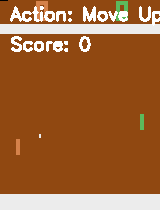

Frame captured successfully: (210, 160, 3)
Ball position: (42, 128)
Predicted ball y position: 76.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


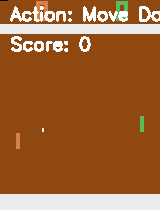

Frame captured successfully: (210, 160, 3)
Ball position: (46, 120)
Predicted ball y position: 76.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












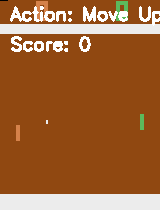

Frame captured successfully: (210, 160, 3)
Ball position: (48, 116)
Predicted ball y position: 76.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


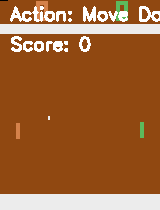

Frame captured successfully: (210, 160, 3)
Ball position: (51, 110)
Predicted ball y position: 76.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












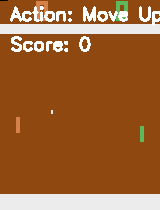

Frame captured successfully: (210, 160, 3)
Ball position: (54, 104)
Predicted ball y position: 76.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


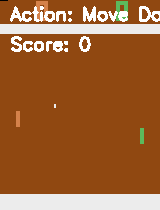

Frame captured successfully: (210, 160, 3)
Ball position: (56, 100)
Predicted ball y position: 76.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












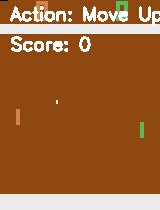

Frame captured successfully: (210, 160, 3)
Ball position: (59, 94)
Predicted ball y position: 76.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


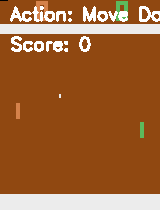

Frame captured successfully: (210, 160, 3)
Ball position: (62, 88)
Predicted ball y position: 76.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












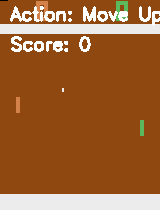

Frame captured successfully: (210, 160, 3)
Ball position: (64, 84)
Predicted ball y position: 76.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


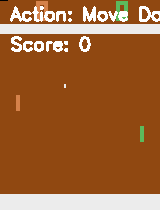

Frame captured successfully: (210, 160, 3)
Ball position: (68, 76)
Predicted ball y position: 76.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












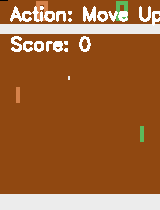

Frame captured successfully: (210, 160, 3)
Ball position: (70, 72)
Predicted ball y position: 76.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


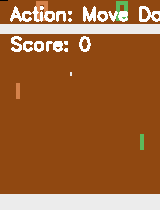

Frame captured successfully: (210, 160, 3)
Ball position: (73, 66)
Predicted ball y position: 76.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












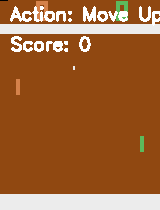

Frame captured successfully: (210, 160, 3)
Ball position: (77, 58)
Predicted ball y position: 76.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


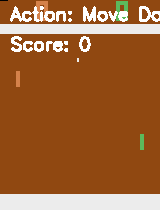

Frame captured successfully: (210, 160, 3)
Ball position: (81, 50)
Predicted ball y position: 76.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












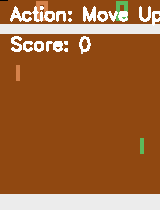

Frame captured successfully: (210, 160, 3)
Ball position: (83, 46)
Predicted ball y position: 76.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


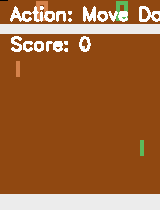

Frame captured successfully: (210, 160, 3)
Ball position: (87, 38)
Predicted ball y position: 76.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












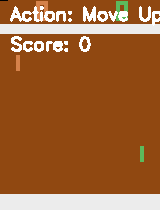

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


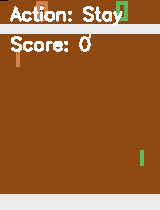

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


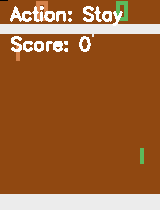

Frame captured successfully: (210, 160, 3)
Ball position: (94, 37)
Predicted ball y position: 29.857142857142858
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












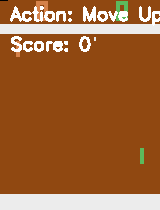

Frame captured successfully: (210, 160, 3)
Ball position: (97, 43)
Predicted ball y position: 137.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


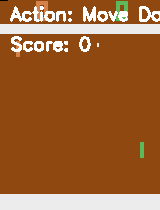

Frame captured successfully: (210, 160, 3)
Ball position: (100, 49)
Predicted ball y position: 137.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


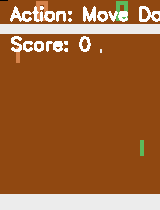

Frame captured successfully: (210, 160, 3)
Ball position: (104, 57)
Predicted ball y position: 137.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


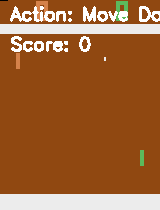

Frame captured successfully: (210, 160, 3)
Ball position: (106, 61)
Predicted ball y position: 137.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


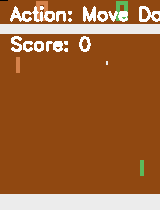

Frame captured successfully: (210, 160, 3)
Ball position: (108, 65)
Predicted ball y position: 137.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


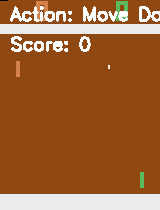

Frame captured successfully: (210, 160, 3)
Ball position: (110, 69)
Predicted ball y position: 137.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












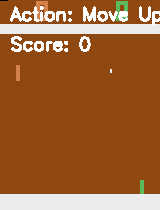

Frame captured successfully: (210, 160, 3)
Ball position: (112, 73)
Predicted ball y position: 137.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


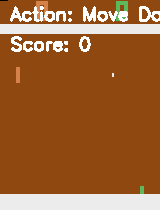

Frame captured successfully: (210, 160, 3)
Ball position: (114, 77)
Predicted ball y position: 137.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












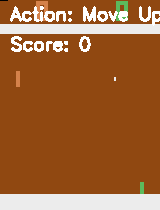

Frame captured successfully: (210, 160, 3)
Ball position: (117, 83)
Predicted ball y position: 137.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


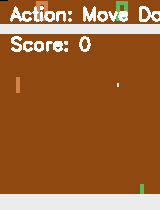

Frame captured successfully: (210, 160, 3)
Ball position: (119, 87)
Predicted ball y position: 137.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












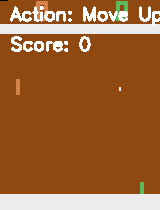

Frame captured successfully: (210, 160, 3)
Ball position: (121, 91)
Predicted ball y position: 137.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


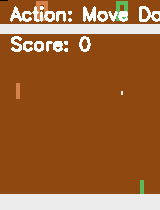

Frame captured successfully: (210, 160, 3)
Ball position: (125, 99)
Predicted ball y position: 137.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












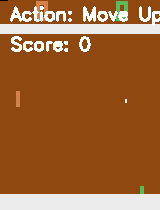

Frame captured successfully: (210, 160, 3)
Ball position: (128, 105)
Predicted ball y position: 137.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


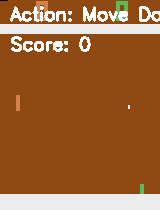

Frame captured successfully: (210, 160, 3)
Ball position: (131, 110)
Predicted ball y position: 131.66666666666666
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












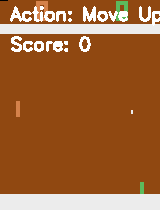

Frame captured successfully: (210, 160, 3)
Ball position: (133, 114)
Predicted ball y position: 136.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


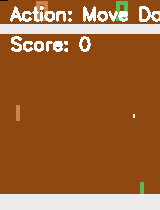

Frame captured successfully: (210, 160, 3)
Ball position: (135, 118)
Predicted ball y position: 136.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












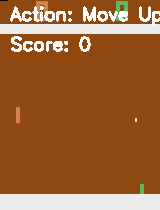

Frame captured successfully: (210, 160, 3)
Ball position: (138, 124)
Predicted ball y position: 136.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


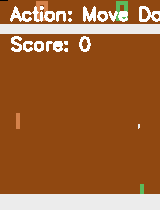

Frame captured successfully: (210, 160, 3)
Ball position: (140, 128)
Predicted ball y position: 136.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












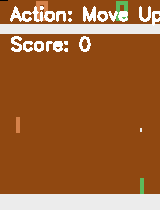

Frame captured successfully: (210, 160, 3)
Ball position: (142, 132)
Predicted ball y position: 136.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


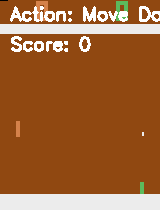

Frame captured successfully: (210, 160, 3)
Ball position: (146, 140)
Predicted ball y position: 136.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












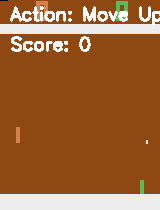

Frame captured successfully: (210, 160, 3)
Ball position: (148, 144)
Predicted ball y position: 136.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


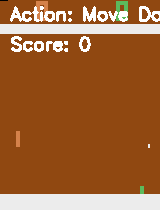

Frame captured successfully: (210, 160, 3)
Ball position: (150, 148)
Predicted ball y position: 136.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












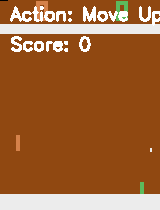

Frame captured successfully: (210, 160, 3)
Ball position: (154, 156)
Predicted ball y position: 136.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.
Score updated: -1.0


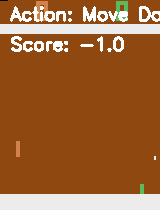

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


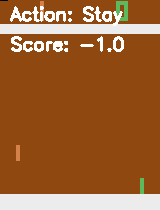

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


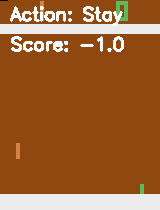

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


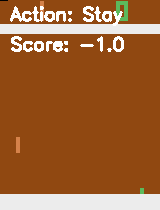

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


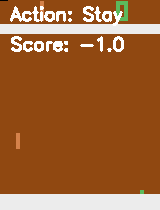

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


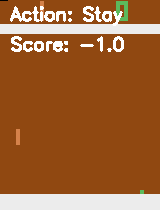

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


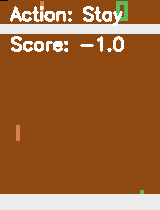

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


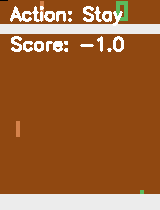

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


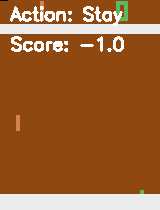

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


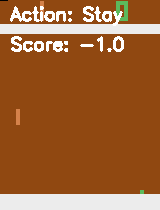

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


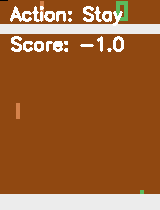

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


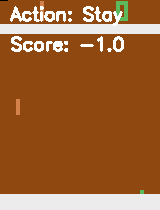

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


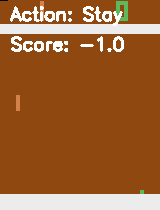

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


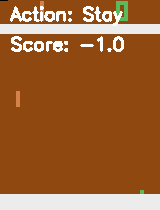

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


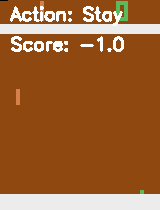

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


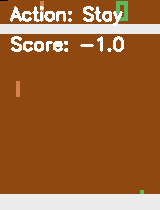

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


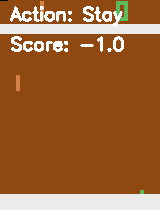

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


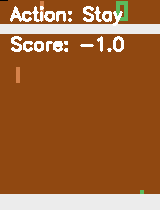

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


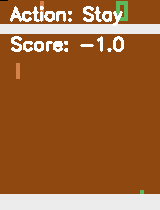

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


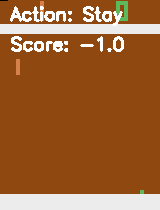

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


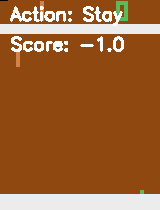

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


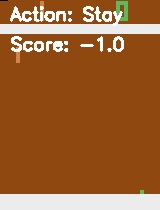

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


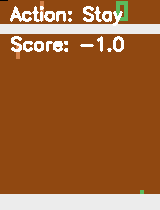

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


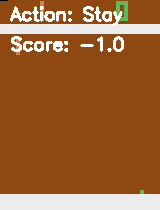

Frame captured successfully: (210, 160, 3)
Ball position: (82, 117)
Predicted ball y position: 150.58333333333334
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


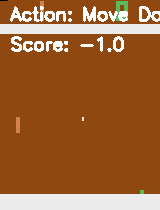

Frame captured successfully: (210, 160, 3)
Ball position: (85, 120)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


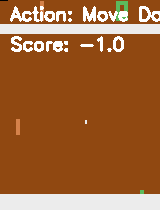

Frame captured successfully: (210, 160, 3)
Ball position: (87, 122)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












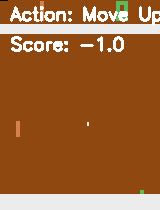

Frame captured successfully: (210, 160, 3)
Ball position: (89, 124)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


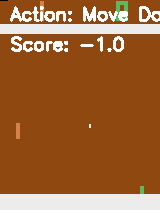

Frame captured successfully: (210, 160, 3)
Ball position: (93, 128)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












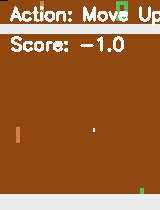

Frame captured successfully: (210, 160, 3)
Ball position: (97, 132)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


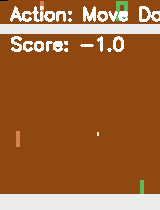

Frame captured successfully: (210, 160, 3)
Ball position: (99, 134)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












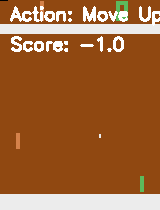

Frame captured successfully: (210, 160, 3)
Ball position: (102, 137)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


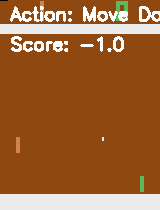

Frame captured successfully: (210, 160, 3)
Ball position: (106, 141)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












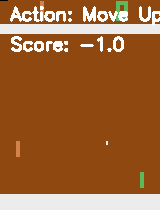

Frame captured successfully: (210, 160, 3)
Ball position: (109, 144)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


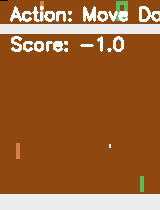

Frame captured successfully: (210, 160, 3)
Ball position: (111, 146)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












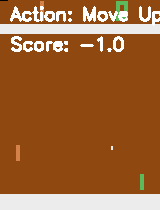

Frame captured successfully: (210, 160, 3)
Ball position: (113, 148)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


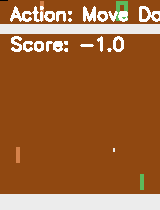

Frame captured successfully: (210, 160, 3)
Ball position: (116, 151)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












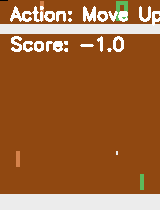

Frame captured successfully: (210, 160, 3)
Ball position: (120, 155)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


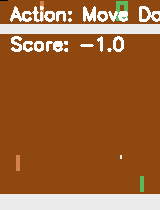

Frame captured successfully: (210, 160, 3)
Ball position: (124, 159)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












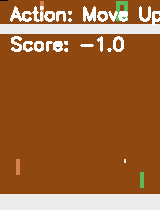

Frame captured successfully: (210, 160, 3)
Ball position: (127, 162)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


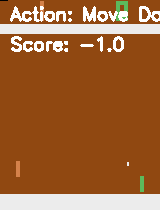

Frame captured successfully: (210, 160, 3)
Ball position: (131, 166)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












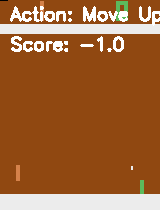

Frame captured successfully: (210, 160, 3)
Ball position: (133, 168)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


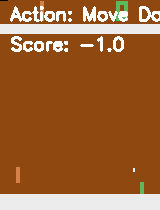

Frame captured successfully: (210, 160, 3)
Ball position: (137, 172)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












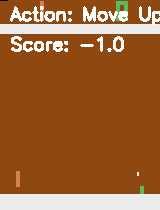

Frame captured successfully: (210, 160, 3)
Ball position: (139, 174)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


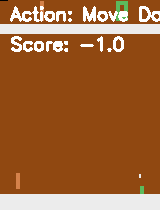

Frame captured successfully: (210, 160, 3)
Ball position: (143, 178)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












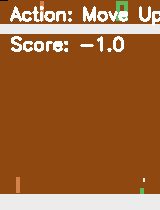

Frame captured successfully: (210, 160, 3)
Ball position: (145, 180)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


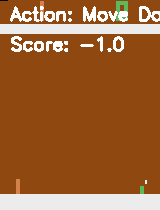

Frame captured successfully: (210, 160, 3)
Ball position: (149, 184)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












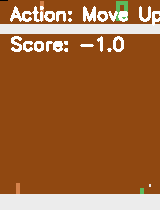

Frame captured successfully: (210, 160, 3)
Ball position: (153, 187)
Predicted ball y position: 180.25
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.
Score updated: -2.0


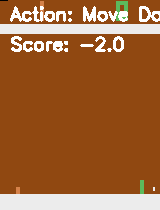

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


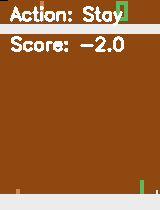

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


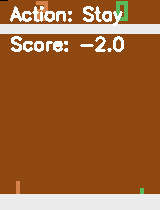

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


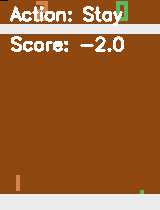

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


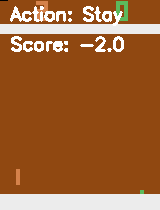

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


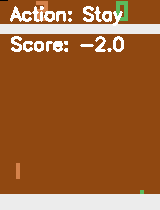

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


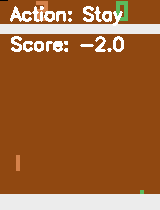

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


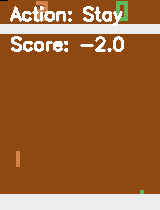

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


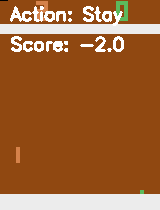

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


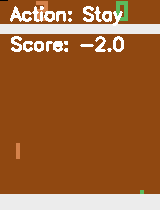

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


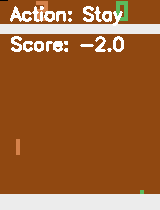

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


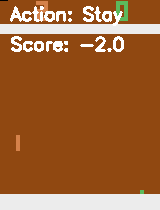

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


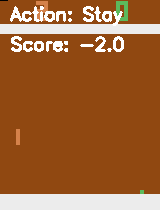

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


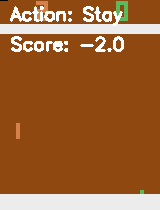

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


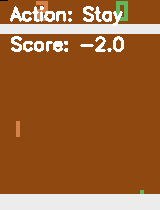

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


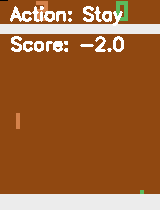

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


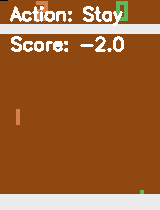

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


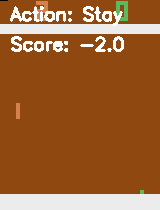

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


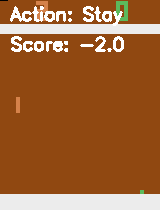

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


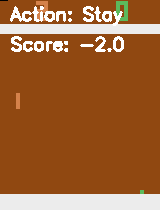

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


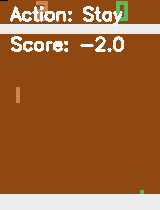

Frame captured successfully: (210, 160, 3)
Ball not found, staying still.


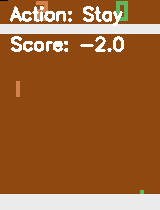

Frame captured successfully: (210, 160, 3)
Ball position: (81, 116)
Predicted ball y position: 178.125
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












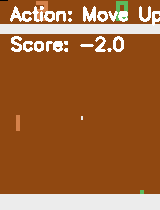

Frame captured successfully: (210, 160, 3)
Ball position: (84, 119)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


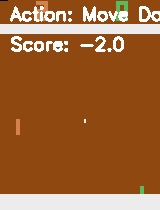

Frame captured successfully: (210, 160, 3)
Ball position: (86, 121)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












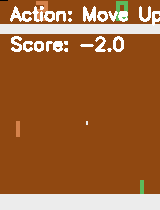

Frame captured successfully: (210, 160, 3)
Ball position: (89, 124)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


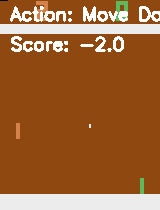

Frame captured successfully: (210, 160, 3)
Ball position: (93, 128)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












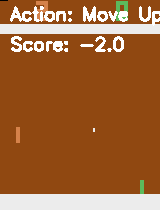

Frame captured successfully: (210, 160, 3)
Ball position: (95, 130)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


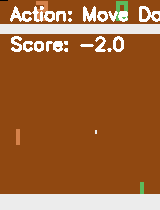

Frame captured successfully: (210, 160, 3)
Ball position: (98, 133)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












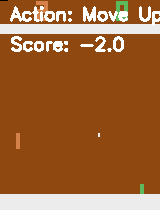

Frame captured successfully: (210, 160, 3)
Ball position: (100, 135)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


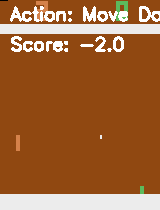

Frame captured successfully: (210, 160, 3)
Ball position: (104, 139)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












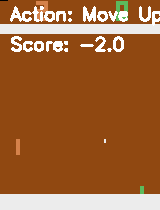

Frame captured successfully: (210, 160, 3)
Ball position: (108, 143)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


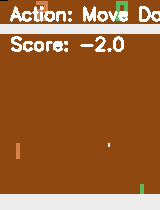

Frame captured successfully: (210, 160, 3)
Ball position: (110, 145)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












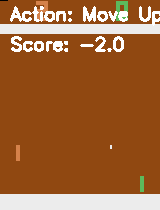

Frame captured successfully: (210, 160, 3)
Ball position: (113, 148)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


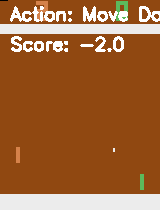

Frame captured successfully: (210, 160, 3)
Ball position: (117, 152)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












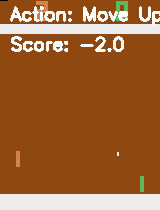

Frame captured successfully: (210, 160, 3)
Ball position: (119, 154)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


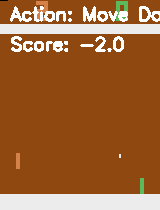

Frame captured successfully: (210, 160, 3)
Ball position: (121, 156)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












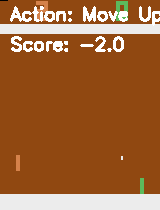

Frame captured successfully: (210, 160, 3)
Ball position: (125, 160)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


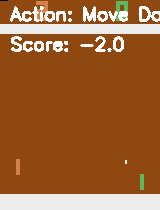

Frame captured successfully: (210, 160, 3)
Ball position: (128, 163)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












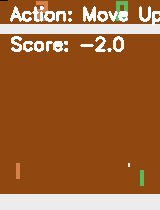

Frame captured successfully: (210, 160, 3)
Ball position: (131, 166)
Predicted ball y position: 179.0
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


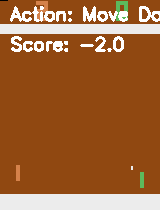

Frame captured successfully: (210, 160, 3)
Ball position: (133, 168)
Predicted ball y position: 179.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












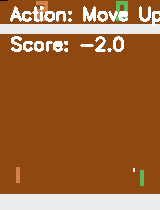

Frame captured successfully: (210, 160, 3)
Ball position: (136, 170)
Predicted ball y position: 175.33333333333334
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


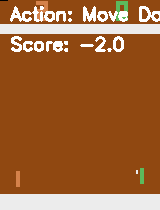

Frame captured successfully: (210, 160, 3)
Ball position: (139, 174)
Predicted ball y position: 180.66666666666666
Model output: The ball is below the paddle. Should the paddle move up, down, or stay to intercept the ball?










Overriding LLM decision: Cannot move up when ball is below.


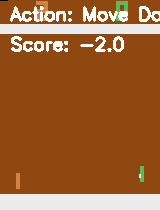

Frame captured successfully: (210, 160, 3)
Ball position: (137, 176)
Predicted ball y position: 169.0
Model output: The ball is above the paddle. Should the paddle move up, down, or stay to intercept the ball?












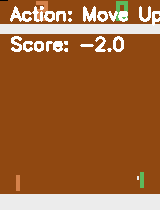

In [ ]:
import time
import gym
import cv2
import numpy as np
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from google.colab.patches import cv2_imshow

# Initialize the LLM (DistilGPT-2 model)
model = GPT2LMHeadModel.from_pretrained('distilgpt2')
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Set the pad_token to eos_token
tokenizer.pad_token = tokenizer.eos_token

# Set model to evaluation mode
model.eval()

# Initialize the Pong environment
env = gym.make('Pong-v4', render_mode='rgb_array')
env.reset()

def detect_ball(frame):
    if frame is not None:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        _, thresh_frame = cv2.threshold(gray_frame, 150, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            if w < 15 and h < 15:
                return (x, y)
    return None

# Function to make the paddle move faster and more precisely towards the ball
def get_paddle_action(predicted_ball_y, player_paddle_y):
    movement_speed = 10  # Adjust this to make the paddle move faster
    threshold = 5  # Threshold to determine when the paddle is close enough to the ball

    # If the ball is already within a small range, stop moving
    if abs(predicted_ball_y - player_paddle_y) <= threshold:
        return 0  # Stay still

    # If the ball is below the paddle, move down
    if predicted_ball_y > player_paddle_y:
        if abs(predicted_ball_y - player_paddle_y) > movement_speed:
            return 3  # Move down faster
        else:
            return 0  # Stay still if already close

    # If the ball is above the paddle, move up
    elif predicted_ball_y < player_paddle_y:
        if abs(predicted_ball_y - player_paddle_y) > movement_speed:
            return 2  # Move up faster
        else:
            return 0  # Stay still if already close

# Function to predict the future position of the ball
def predict_ball_y(ball_x, ball_y, prev_ball_x, prev_ball_y, paddle_x):
    # Calculate the ball's velocity in x and y directions
    ball_velocity_x = ball_x - prev_ball_x
    ball_velocity_y = ball_y - prev_ball_y

    if ball_velocity_x == 0:
        # Ball is not moving in x direction, no prediction possible
        return ball_y

    # Time to reach the paddle
    time_to_reach_paddle = (paddle_x - ball_x) / ball_velocity_x

    # Predict future y position of the ball
    predicted_ball_y = ball_y + ball_velocity_y * time_to_reach_paddle

    # Handle bouncing off the top and bottom of the screen
    while predicted_ball_y < 0 or predicted_ball_y > 210:
        if predicted_ball_y < 0:
            predicted_ball_y = -predicted_ball_y
        elif predicted_ball_y > 210:
            predicted_ball_y = 420 - predicted_ball_y

    return predicted_ball_y

# Function to use LLM to predict paddle movement based on ball position and velocity
def llm_predict_paddle_action(ball_y, paddle_y):
    if ball_y > paddle_y:
        relative_position = "below"
    elif ball_y < paddle_y:
        relative_position = "above"
    else:
        relative_position = "aligned"

    input_text = (f"The ball is {relative_position} the paddle. "
                  "Should the paddle move up, down, or stay to intercept the ball?")

    # Tokenize the input text
    inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)

    # Generate the model's output
    with torch.no_grad():
        outputs = model.generate(
            inputs['input_ids'],
            attention_mask=inputs['attention_mask'],
            max_new_tokens=10,
            pad_token_id=tokenizer.eos_token_id
        )

    # Decode the output and extract the generated text
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(f"Model output: {generated_text}")

    # Post-process the output to detect movement keywords
    if 'up' in generated_text.lower():
        return 2  # Move up
    elif 'down' in generated_text.lower():
        return 3  # Move down
    else:
        return 0  # Stay still (fallback case)
# Main game loop with rule-based overrides and LLM
def random_play():
    step = 0
    score = 0
    player_paddle_y = 80  # Initial paddle y position
    prev_ball_x, prev_ball_y = None, None  # Previous ball position
    contact_made = False  # Track if the paddle makes contact with the ball

    env.reset()
    env.seed(22)

    while True:
        step += 1

        # Render the game
        time.sleep(0.05)  # Adjust the delay for smoother gameplay
        frame = env.render(mode='rgb_array')

        if frame is not None:
            print(f"Frame captured successfully: {frame.shape}")
        else:
            print("Failed to capture frame.")
            continue

        # Detect the ball's position
        ball_position = detect_ball(frame)
        if ball_position:
            ball_x, ball_y = ball_position
            print(f"Ball position: {ball_position}")

            # If we have a previous ball position, calculate its velocity and predict future position
            if prev_ball_x is not None and prev_ball_y is not None:
                paddle_x = 144  # X-coordinate of the paddle
                predicted_ball_y = predict_ball_y(ball_x, ball_y, prev_ball_x, prev_ball_y, paddle_x)
                print(f"Predicted ball y position: {predicted_ball_y}")

                # Use the LLM to predict the paddle movement based on the ball and paddle positions
                action = llm_predict_paddle_action(predicted_ball_y, player_paddle_y)

                # Override the LLM if the prediction doesn't make sense
                if predicted_ball_y > player_paddle_y and action == 2:  # Prevent moving up when ball is below
                    print("Overriding LLM decision: Cannot move up when ball is below.")
                    action = 3  # Move down

                if predicted_ball_y < player_paddle_y and action == 3:  # Prevent moving down when ball is above
                    print("Overriding LLM decision: Cannot move down when ball is above.")
                    action = 2  # Move up

            else:
                action = 0  # Stay still if we don't have enough info about ball movement

            # Update previous ball position
            prev_ball_x, prev_ball_y = ball_x, ball_y
        else:
            print("Ball not found, staying still.")
            action = 0  # Stay still if ball not found

        # Perform the action in the environment
        state, reward, done, info = env.step(action)

        # Apply custom rewards
        if reward != 0:
            if reward > 0 and not contact_made:
                reward += 10  # Increase reward for contact with the ball
                contact_made = True  # Mark contact made
                print("Contact with the ball! Increased reward.")

            if reward > 0 and contact_made:
                reward += 1  # Increase reward for scoring
                print("Point scored! Greatly increased reward.")

            score += reward
            print(f"Score updated: {score}")

        # Update player paddle Y position based on action
        if action == 2:  # Moving up
            player_paddle_y = max(0, player_paddle_y - 20)  # Faster movement
        elif action == 3:  # Moving down
            player_paddle_y = min(210, player_paddle_y + 20)

        # Add text to display the action selected
        action_text = "Action: Stay" if action == 0 else ("Action: Move Up" if action == 2 else "Action: Move Down")
        cv2.putText(frame, action_text, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

        # Add text to display the score
        score_text = f"Score: {score}"
        cv2.putText(frame, score_text, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

        # Display the frame with action and score overlay
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  # Convert to BGR for OpenCV
        cv2_imshow(frame_bgr)  # Use the Colab-specific function to display the frame

        # If the game is done, end the loop
        if done or step > 300:
            env.close()
            print("Your Score at the end of the game is: ", score)
            break
random_play()


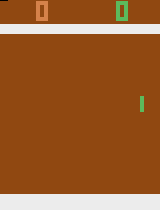

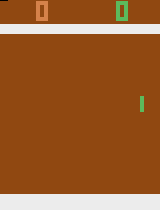

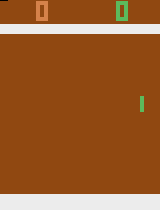

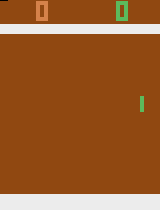

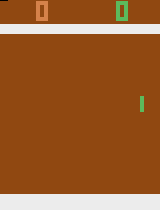

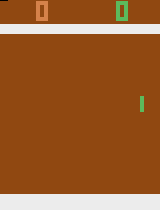

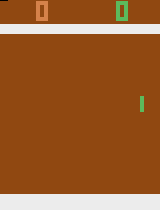

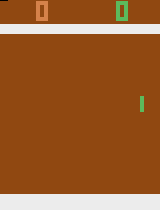

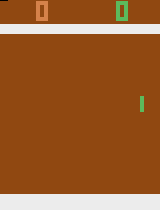

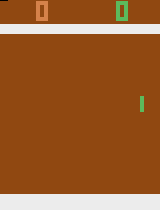

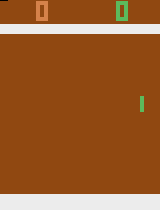

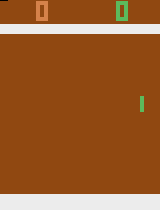

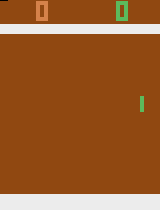

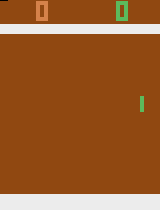

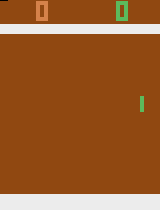

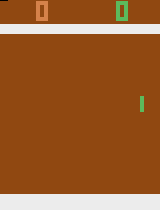

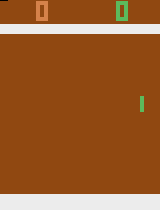

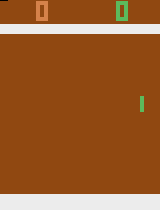

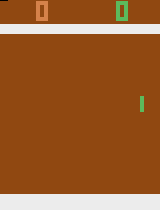

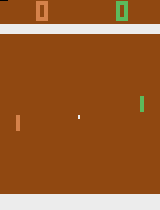

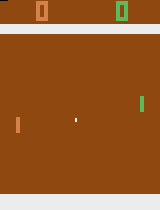

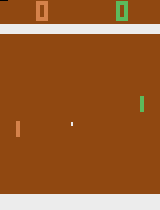

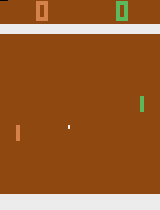

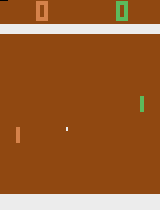

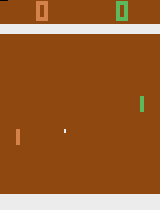

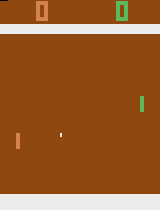

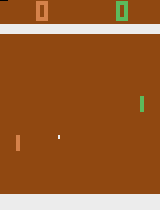

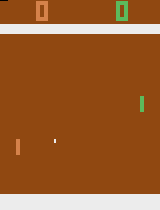

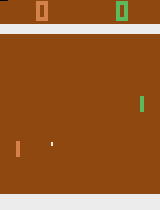

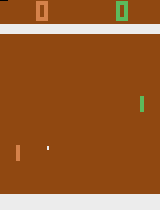

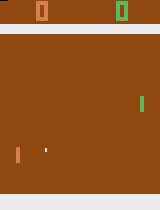

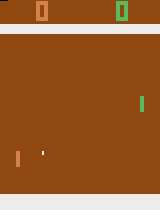

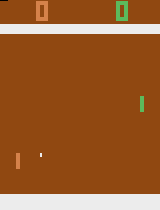

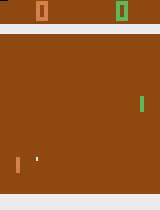

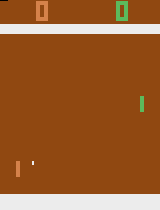

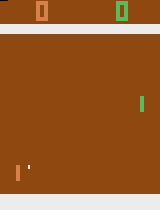

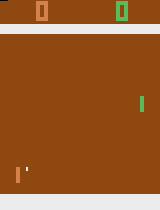

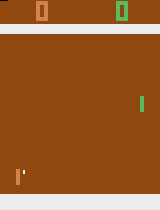

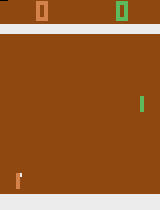

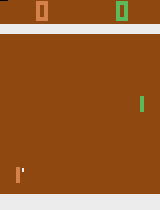

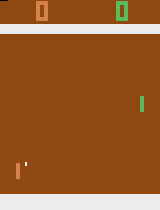

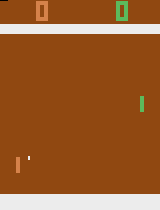

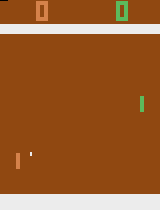

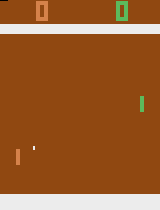

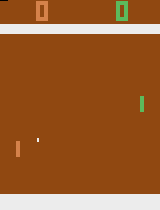

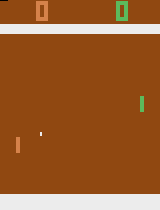

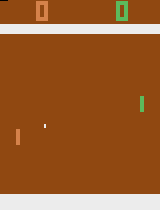

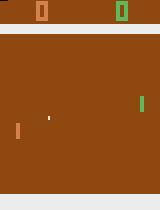

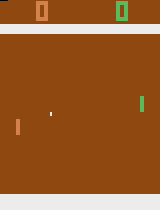

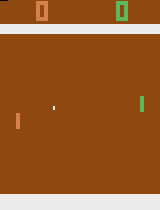

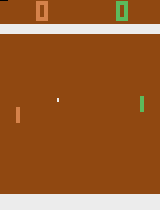

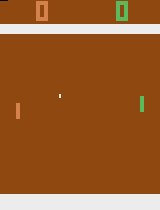

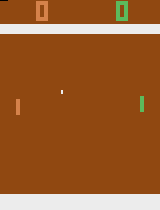

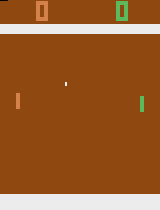

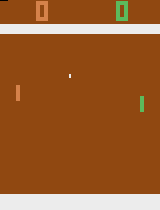

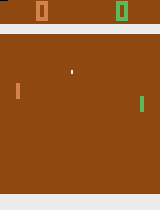

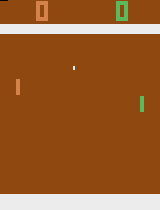

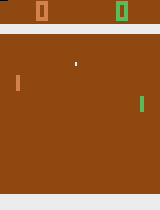

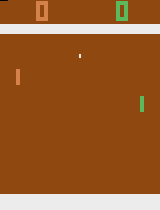

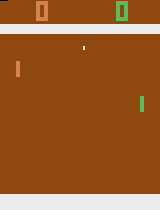

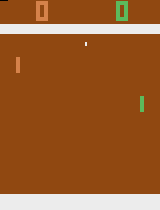

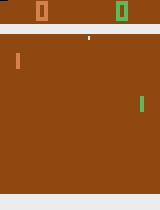

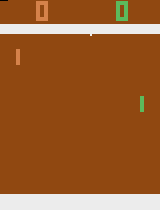

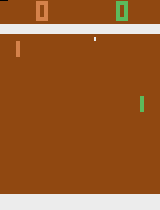

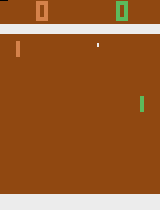

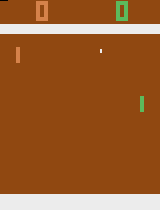

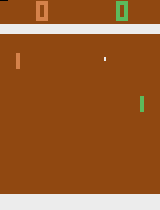

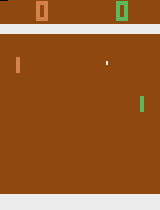

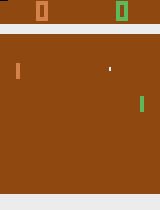

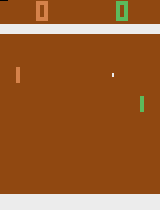

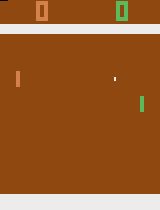

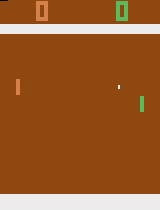

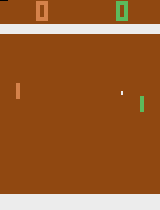

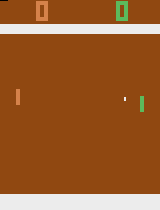

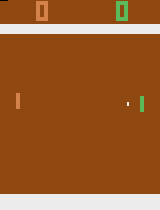

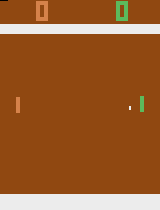

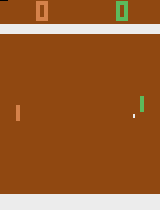

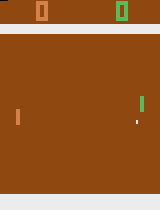

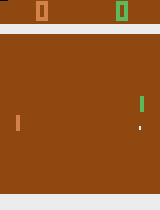

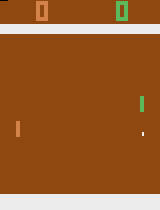

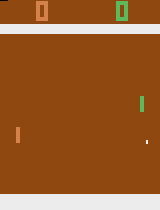

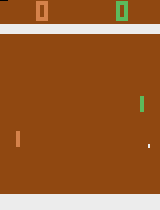

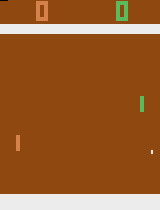

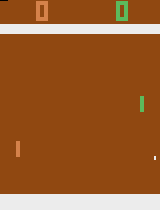

Score updated: -1.0


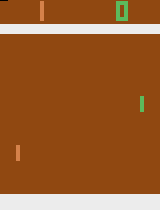

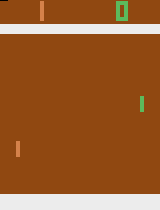

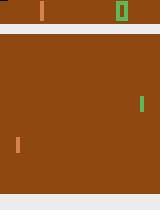

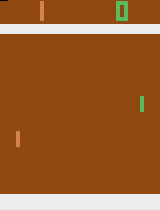

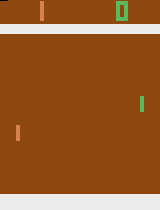

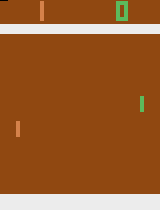

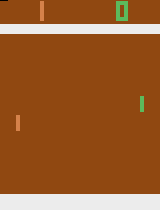

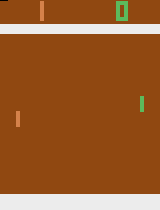

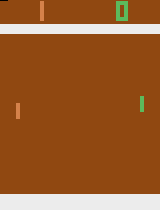

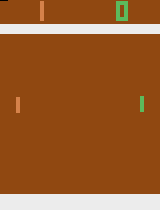

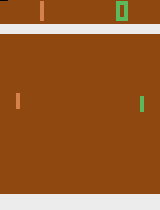

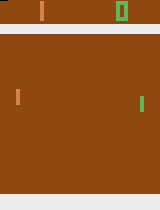

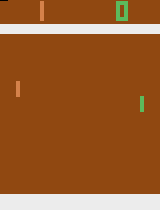

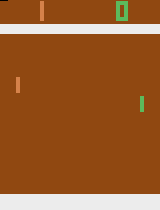

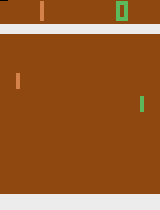

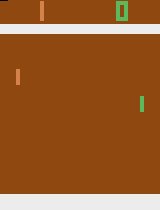

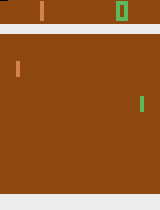

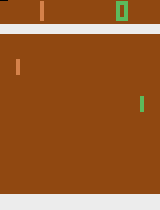

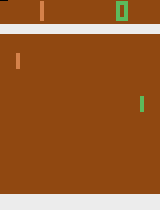

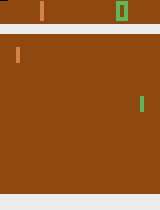

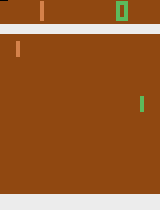

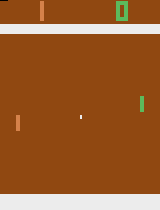

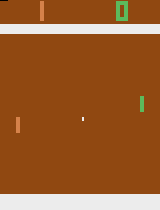

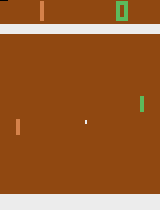

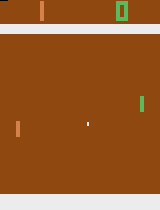

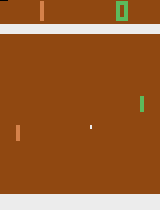

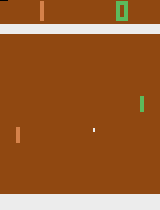

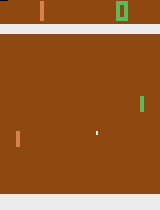

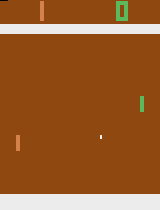

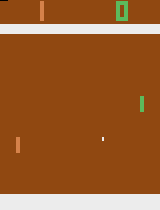

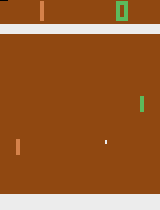

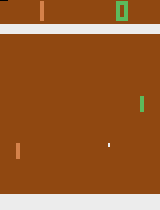

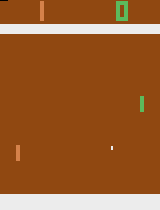

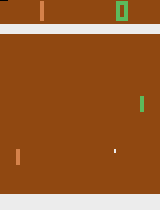

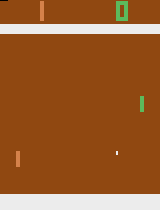

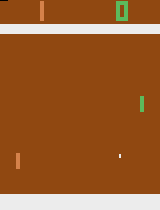

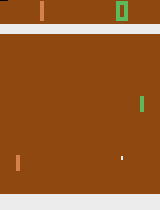

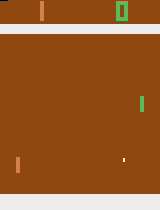

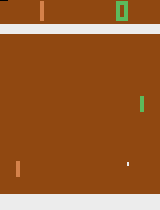

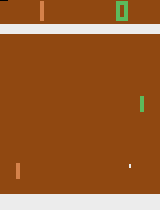

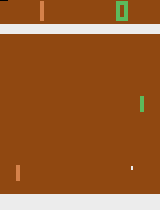

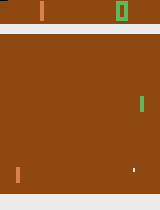

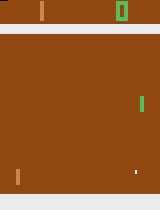

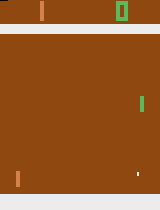

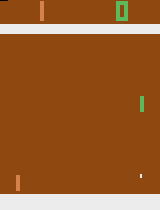

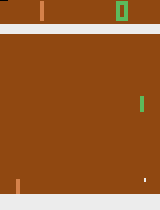

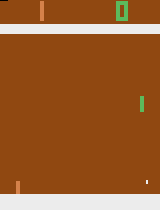

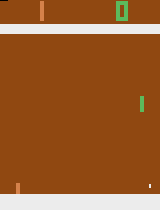

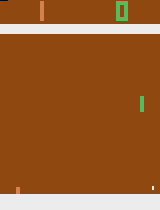

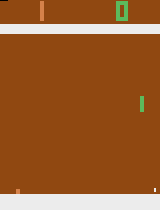

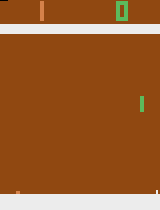

Score updated: -2.0


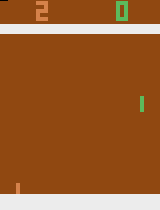

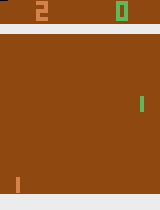

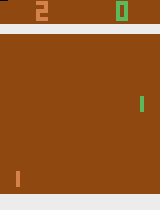

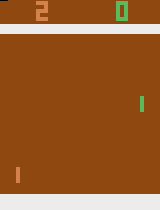

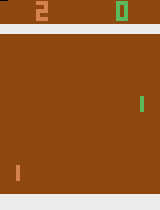

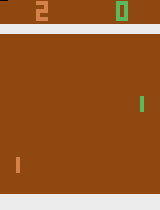

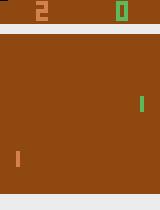

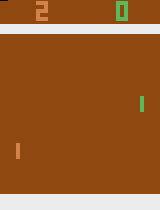

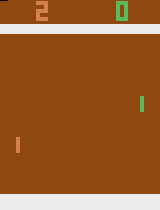

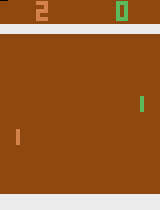

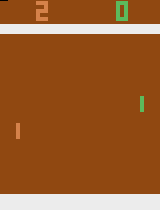

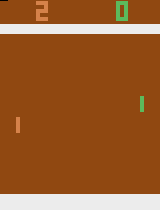

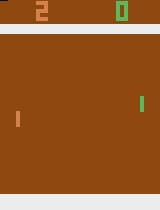

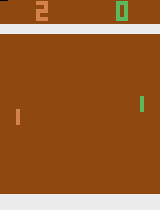

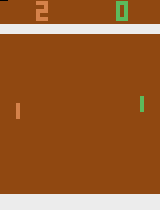

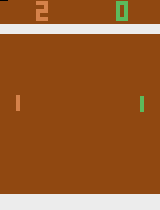

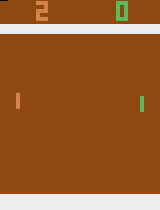

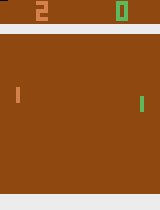

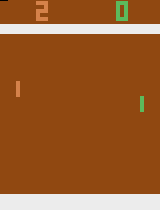

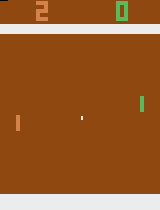

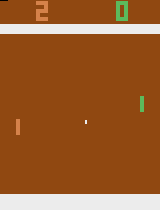

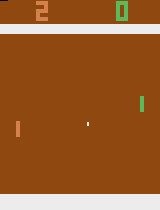

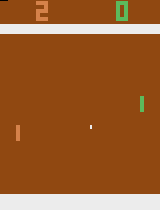

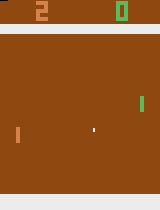

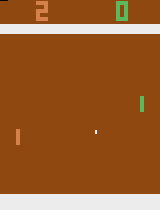

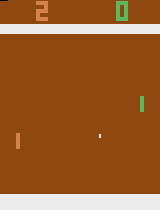

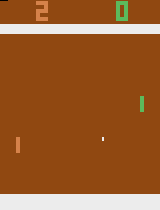

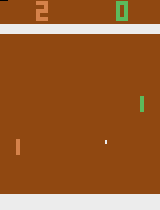

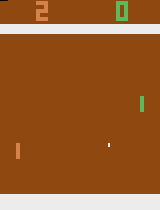

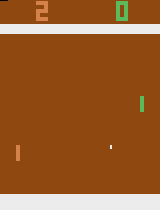

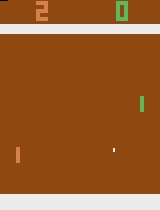

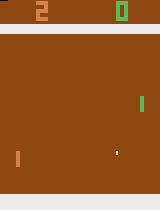

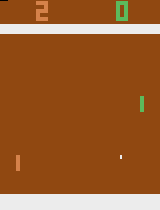

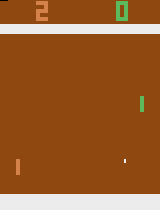

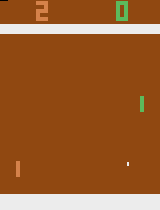

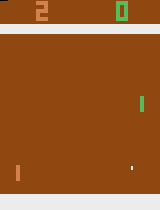

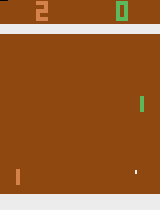

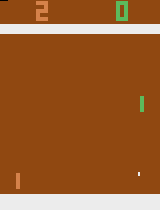

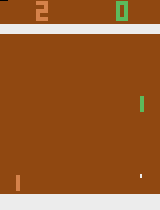

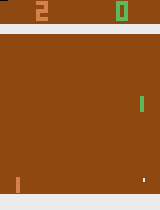

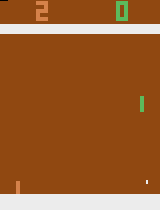

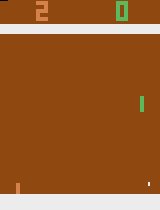

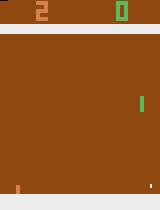

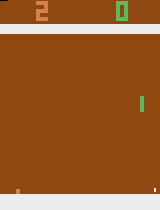

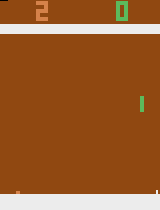

Score updated: -3.0


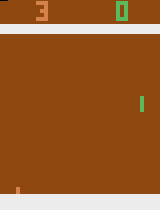

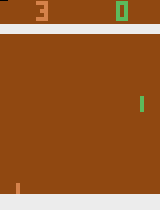

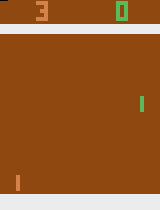

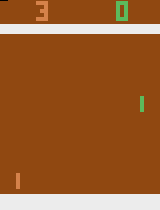

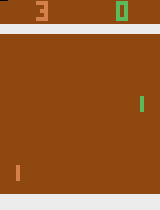

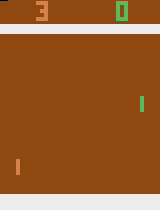

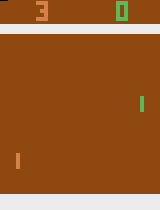

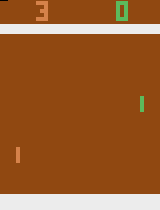

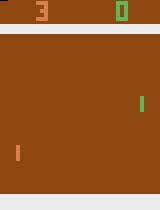

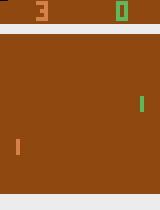

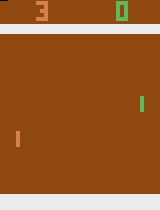

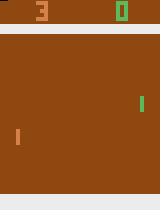

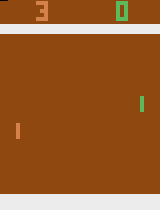

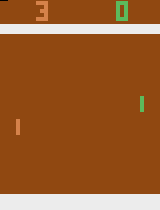

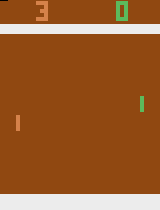

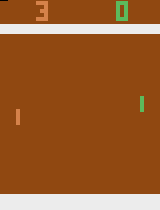

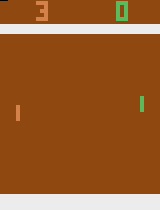

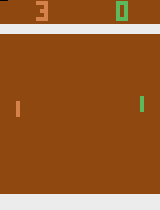

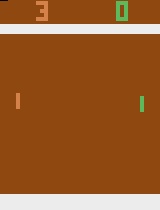

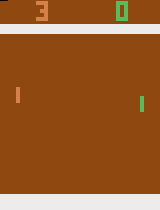

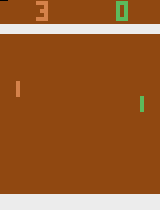

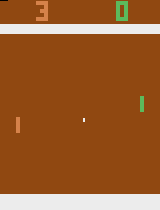

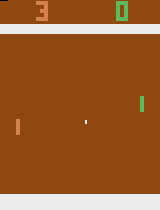

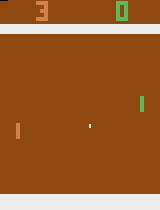

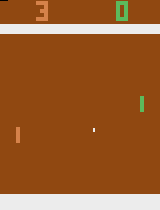

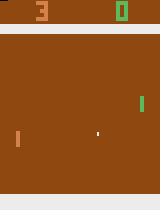

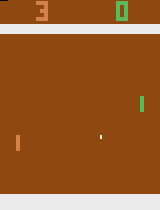

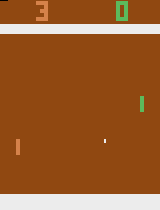

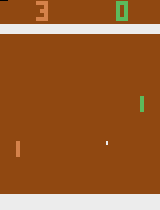

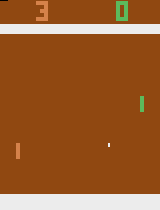

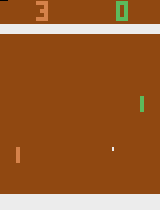

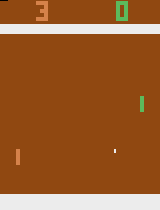

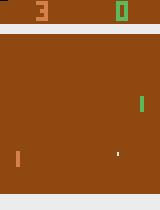

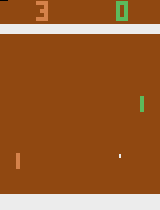

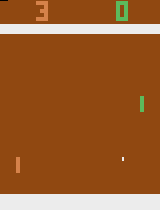

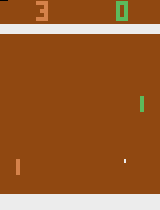

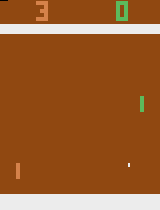

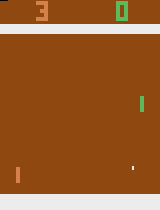

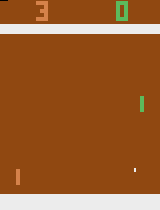

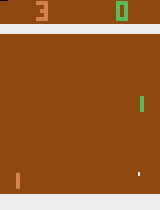

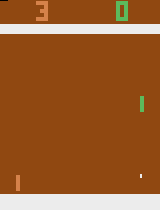

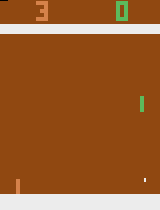

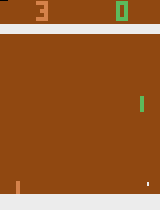

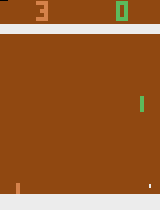

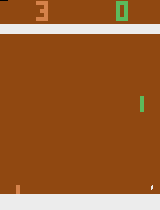

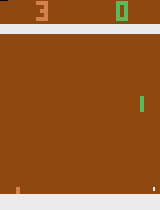

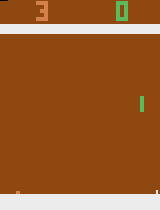

Score updated: -4.0


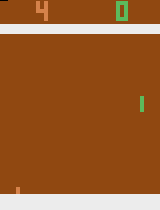

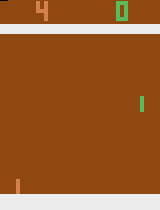

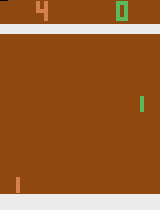

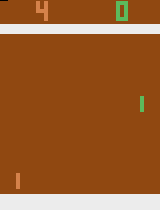

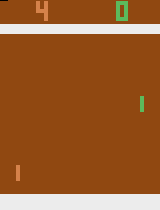

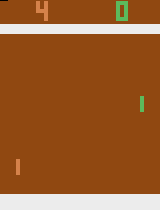

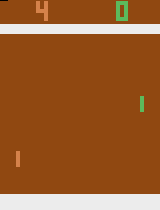

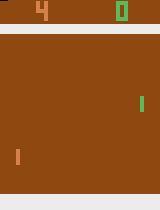

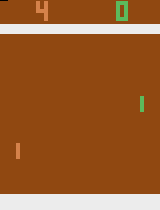

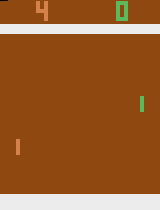

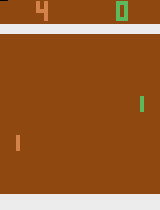

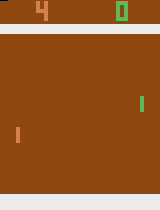

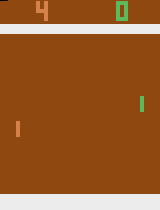

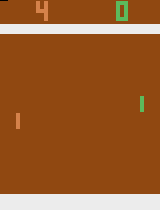

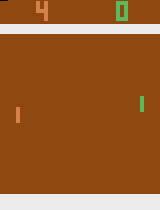

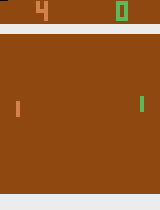

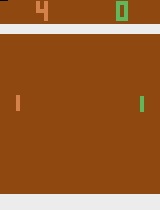

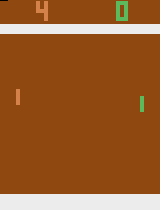

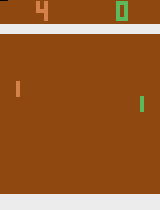

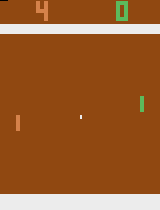

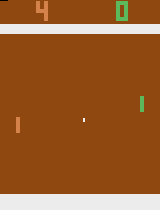

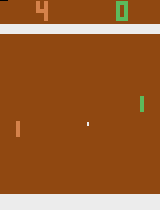

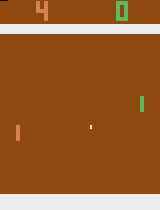

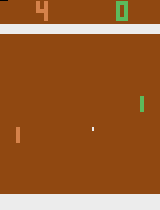

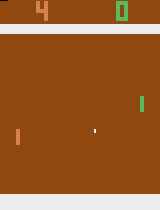

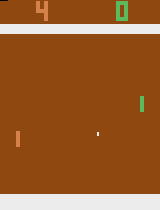

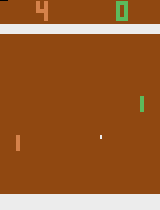

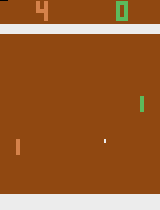

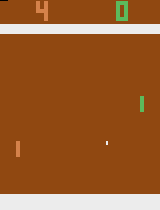

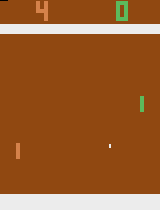

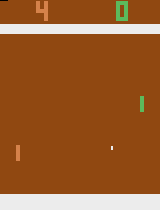

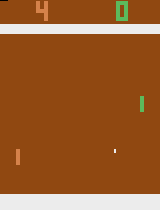

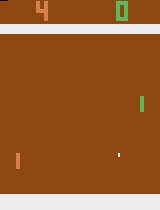

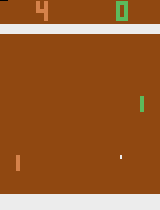

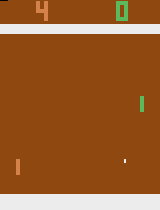

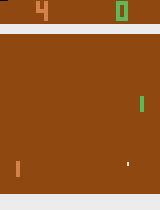

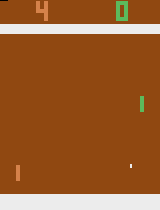

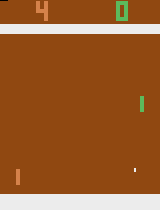

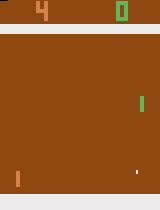

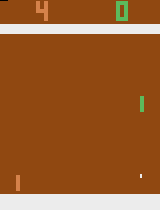

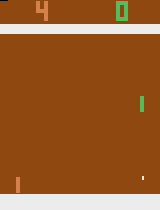

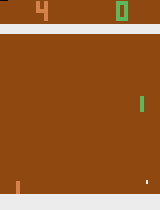

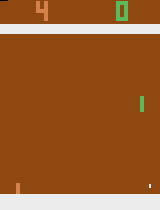

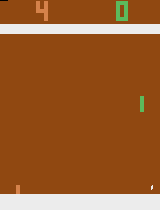

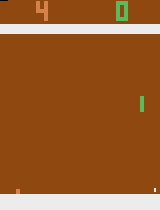

Score updated: -5.0


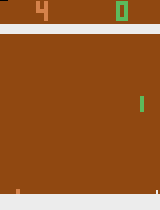

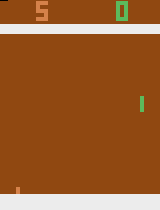

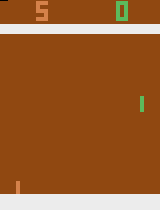

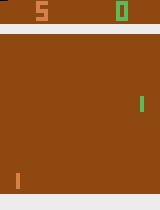

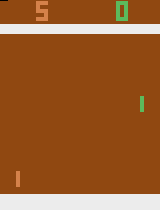

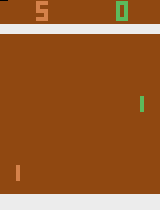

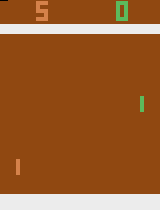

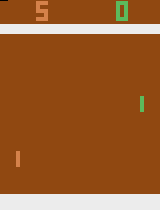

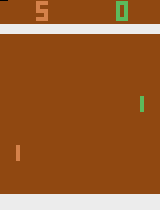

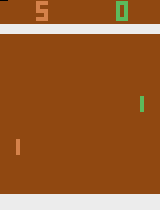

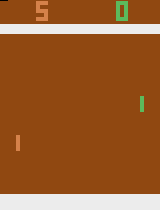

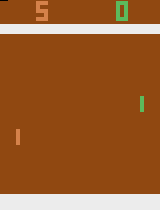

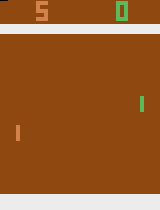

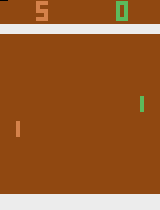

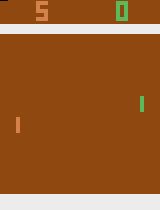

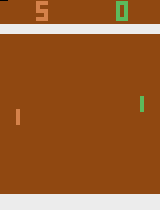

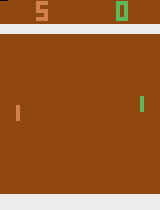

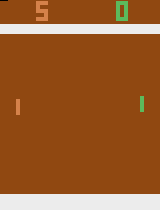

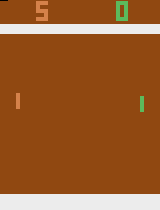

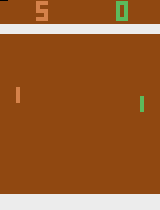

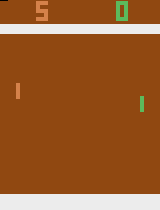

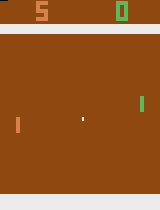

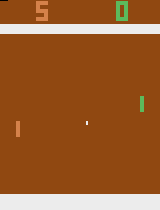

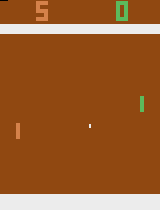

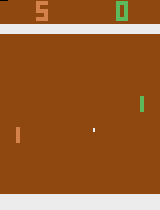

KeyboardInterrupt: 

In [ ]:
import time
import gym
import cv2
import numpy as np
import pygame
from google.colab.patches import cv2_imshow  # Import the Colab-specific imshow function

# Initialize the Pong environment in 'rgb_array' mode
env = gym.make('Pong-v4', render_mode='rgb_array')
env.reset()

# Initialize pygame to capture keyboard inputs
pygame.init()
screen = pygame.display.set_mode((400, 300))

def human_play():
    step = 0
    score = 0
    player_paddle_y = 80  # Initial paddle y position

    env.reset()

    running = True
    while running:
        step += 1

        # Handle events for quitting the game or pressing keys
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        # Capture key presses
        keys = pygame.key.get_pressed()

        # Move the paddle up if the up arrow is pressed
        if keys[pygame.K_UP]:
            action = 2  # Move up
        # Move the paddle down if the down arrow is pressed
        elif keys[pygame.K_DOWN]:
            action = 3  # Move down
        else:
            action = 0  # Stay still

        # Perform the action in the environment
        state, reward, done, info = env.step(action)

        # Update player paddle Y position based on action
        if action == 2:  # Moving up
            player_paddle_y = max(0, player_paddle_y - 20)  # Faster movement
        elif action == 3:  # Moving down
            player_paddle_y = min(210, player_paddle_y + 20)

        # Update score based on reward
        if reward != 0:
            score += reward
            print(f"Score updated: {score}")

        # Render the game as rgb_array and display it with OpenCV
        frame = env.render(mode='rgb_array')  # Corrected render call
        if frame is not None:
            frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  # Convert to BGR for OpenCV
            cv2_imshow(frame_bgr)  # Use the Colab-specific function to display the frame

        # Check if the user presses the ESC key to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            running = False

        # If the game is done, end the loop
        if done:
            env.close()
            print("Your Score at the end of the game is: ", score)
            break

        # Delay to make the game playable at human speed
        time.sleep(0.05)

    # Close OpenCV window
    cv2.destroyAllWindows()

# Run the human-controlled game loop
human_play()

# Quit pygame when the game is closed
pygame.quit()
